<a href="https://colab.research.google.com/github/financieras/math/blob/main/regresion/regresion_lineal01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recta de regresión
Ejercicio de regresión lineal simple con un ajuste por mínimos cuadrados ordinarios.


## Etapa 1. Generación aleatoria del dataset
Generar un dataset con datos generados de forma aleatoria para obtener una nube de puntos entre dos variables:
    - la variable `y` (variable dependiente) es el precio de un automóvil de segunda mano y
    - la variable `x` (variable independiente) es el número de Kilómetros que tiene ese coche.
- Generamos 100 parejas de datos.

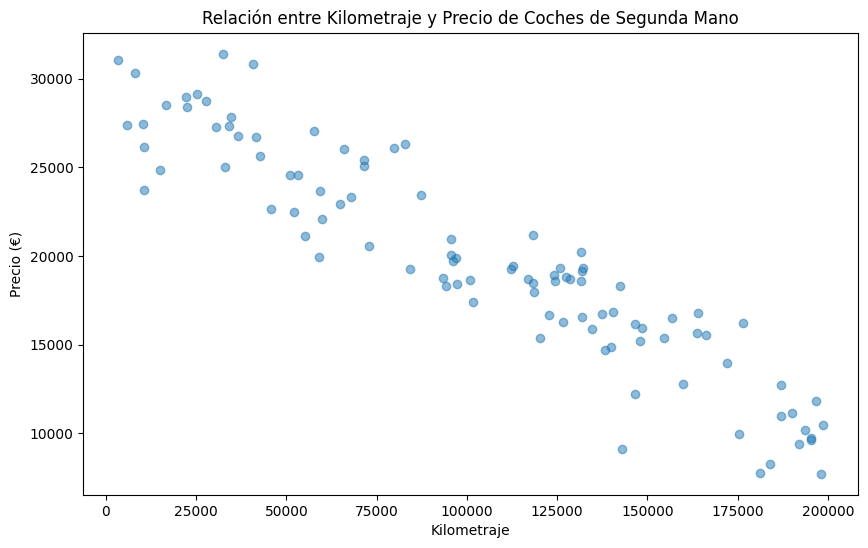

Primeras 5 parejas de datos (Kilometraje, Precio):
(42670, 25640.70)
(131782, 16564.83)
(140417, 16817.30)
(126673, 16268.55)
(71583, 25418.07)


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Configurar la semilla aleatoria para reproducibilidad
np.random.seed()

# Generar 100 valores aleatorios para el kilometraje (variable independiente x)
# Asumimos que los coches tienen entre 0 y 200,000 km
x = np.random.uniform(0, 200000, 100)

# Generar los precios (variable dependiente y) basados en el kilometraje
# Usamos una relación lineal con algo de ruido aleatorio
# Asumimos que un coche nuevo cuesta alrededor de 30,000 y pierde valor con el kilometraje
y = 30000 - 0.1 * x + np.random.normal(0, 2000, 100)

# Asegurémonos de que no hay precios menores a 2500
y = np.maximum(y, 2500)

# Visualizar los datos generados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Kilometraje')
plt.ylabel('Precio (€)')
plt.title('Relación entre Kilometraje y Precio de Coches de Segunda Mano')
plt.show()

# Imprimir las primeras 5 parejas de datos
print("Primeras 5 parejas de datos (Kilometraje, Precio):")
for i in range(5):
    print(f"({x[i]:.0f}, {y[i]:.2f})")



## Etapa 2. Estimación de la recta de regresión
Realizar la estimación de la recta de regresión usando dos métodos.
    - Método 1: usando una librería que tenga alguna función que me de directamente el resultado de los parámetros estimados de la recta de regresión.
    - Método 2: Si usar librería, haciendo directamente los cálculos.

### Etapa2. Método1.
* Consiste en realizar la estimación de la recta de regresión utilizando una librería que proporcione directamente los parámetros estimados.
* Para este método, utilizaremos la librería `sklearn` (Scikit-learn), que es muy popular para tareas de aprendizaje automático en Python.

Este código hace lo siguiente:
    1. Importa las clases y funciones necesarias de sklearn.
    2. Reshape 'x' para que sea una matriz 2D, como lo requiere sklearn.
    3. Crea un modelo de regresión lineal y lo ajusta a los datos.
    4. Extrae la pendiente y el intercepto del modelo ajustado.
    5. Calcula el coeficiente de determinación R².
    6. Imprime los resultados, incluyendo la ecuación de la recta de regresión.
    7. Genera predicciones para todos los puntos X, que se utilizarán para graficar la línea de regresión en la Etapa 3.

* Este método proporciona no solo los parámetros de la recta de regresión, sino también una medida de la bondad del ajuste (R²).

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Asumimos que ya tenemos los datos 'x' e 'y' de la Etapa 1

# Reshape x para que sea una matriz 2D (requerido por sklearn)
X = x.reshape(-1, 1)

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener los parámetros de la recta de regresión
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Calcular el coeficiente de determinación R²
r_cuadrado = r2_score(y, modelo.predict(X))

# Imprimir los resultados
print("Resultados de la regresión lineal (sklearn):")
print(f"Pendiente (β1): {pendiente:.4f}")
print(f"Intercepto (β0): {intercepto:.4f}")
print(f"Ecuación de la recta: y = {pendiente:.4f}x + {intercepto:.4f}")
print(f"Coeficiente de determinación (R²): {r_cuadrado:.4f}")

# Generar predicciones para la línea de regresión
y_pred = modelo.predict(X)

Resultados de la regresión lineal (sklearn):
Pendiente (β1): -0.0991
Intercepto (β0): 29953.8507
Ecuación de la recta: y = -0.0991x + 29953.8507
Coeficiente de determinación (R²): 0.8690


### Etapa2. Método 2.
* En este método, calculamos los parámetros de la recta de regresión directamente, sin utilizar una librería específica para regresión.
* Utilizaremos las fórmulas de mínimos cuadrados ordinarios para calcular la pendiente y el intercepto.

Este código hace lo siguiente:

1. Calcula los promedios de x e y.
2. Calcula la pendiente (β1) utilizando la fórmula de mínimos cuadrados ordinarios.
3. Calcula el intercepto (β0) utilizando la fórmula y = mx + b.
4. Genera predicciones para todos los puntos x.
5. Calcula el coeficiente de determinación R² manualmente.
6. Imprime los resultados, incluyendo la ecuación de la recta de regresión.

Las fórmulas utilizadas son:

- Pendiente (β1) = Σ((x - x̄)(y - ȳ)) / Σ((x - x̄)²)
- Intercepto (β0) = ȳ - β1 * x̄
- R² = 1 - (SS_residual / SS_total)

Donde:
- x̄ y ȳ son las medias de x e y respectivamente.
- SS_residual es la suma de los cuadrados de los residuos.
- SS_total es la suma total de cuadrados.

Este método te permite entender y aplicar directamente las fórmulas de regresión lineal, lo cual es valioso desde un punto de vista educativo y para comprender los fundamentos del proceso.

In [21]:
import numpy as np

# Asumimos que ya tenemos los datos 'x' e 'y' de la Etapa 1

# Calcular los promedios de x e y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calcular la pendiente (β1)
numerador = np.sum((x - x_mean) * (y - y_mean))
denominador = np.sum((x - x_mean)**2)
pendiente = numerador / denominador

# Calcular el intercepto (β0)
intercepto = y_mean - pendiente * x_mean

# Calcular las predicciones
y_pred = pendiente * x + intercepto

# Calcular el coeficiente de determinación R²
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - y_pred)**2)
r_cuadrado = 1 - (ss_residual / ss_total)

# Imprimir los resultados
print("Resultados de la regresión lineal (cálculo manual):")
print(f"Pendiente (β1): {pendiente:.4f}")
print(f"Intercepto (β0): {intercepto:.4f}")
print(f"Ecuación de la recta: y = {pendiente:.4f}x + {intercepto:.4f}")
print(f"Coeficiente de determinación (R²): {r_cuadrado:.4f}")

Resultados de la regresión lineal (cálculo manual):
Pendiente (β1): -0.0991
Intercepto (β0): 29953.8507
Ecuación de la recta: y = -0.0991x + 29953.8507
Coeficiente de determinación (R²): 0.8690


## Etapa 3. Representar la recta de regresión
* Representamos gráficamente la nube de puntos y la recta de regresión. Utilizaremos Matplotlib para crear esta visualización.

Este código hace lo siguiente:

1. Crea una nueva figura con un tamaño específico.
2. Grafica los puntos de datos originales como un diagrama de dispersión en azul.
3. Grafica la línea de regresión en rojo.
4. Configura el título del gráfico y las etiquetas de los ejes.
5. Añade una leyenda para identificar los datos y la línea de regresión.
6. Agrega una cuadrícula para mejorar la legibilidad.
7. Ajusta el límite inferior del eje y para que comience en 0, lo cual es apropiado para precios.
8. Muestra el gráfico.
9. Opcionalmente, incluye una línea comentada para guardar la figura como un archivo de imagen.

Este gráfico te permitirá visualizar cómo la línea de regresión se ajusta a los datos, lo cual es crucial para entender la relación entre el kilometraje y el precio de los coches de segunda mano en tu conjunto de datos simulado.

Algunas observaciones adicionales:

- La dispersión de los puntos alrededor de la línea de regresión te dará una idea visual de qué tan bien el modelo lineal se ajusta a los datos.
- Si la línea de regresión parece ser una buena representación de la tendencia general de los datos, esto sugiere que el modelo lineal es apropiado para estos datos.
- Cualquier patrón sistemático en la dispersión de los puntos alrededor de la línea podría indicar que un modelo más complejo podría ser necesario.

In [ ]:
import matplotlib.pyplot as plt

# Asumimos que ya tenemos 'x', 'y', 'pendiente', 'intercepto' y 'y_pred' de las etapas anteriores

# Crear la figura y los ejes
plt.figure(figsize=(12, 8))

# Graficar los puntos de datos originales
plt.scatter(x, y, color='blue', alpha=0.5, label='Datos')

# Graficar la línea de regresión
plt.plot(x, y_pred, color='red', label=f'Regresión (y = {pendiente:.4f}x + {intercepto:.4f})')

# Configurar el título y las etiquetas de los ejes
plt.title('Regresión Lineal: Precio vs. Kilometraje de Coches de Segunda Mano', fontsize=15)
plt.xlabel('Kilometraje', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)

# Añadir una leyenda
plt.legend(fontsize=10)

# Añadir una cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los límites del eje y para que comience en 0
plt.ylim(bottom=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Opcionalmente, guardar la figura
# plt.savefig('regresion_lineal_coches.png', dpi=300, bbox_inches='tight')

## Etapa4. Predicción
* Hacer una predicción para un valor dado de la variable X (en este caso, el kilometraje) y estimar el precio correspondiente del coche según la recta de regresión.


Este código hace lo siguiente:

1. Define una función para predecir el precio dado un kilometraje.
2. Realiza una predicción para un coche con 100,000 km.
3. Calcula el intervalo de confianza del 95% para la predicción.
4. Imprime el resultado de la predicción y el intervalo de confianza.
5. Crea un nuevo gráfico que incluye:
   - Los datos originales
   - La línea de regresión
   - El punto de predicción
   - El intervalo de confianza para la predicción

Algunas observaciones importantes:

- La predicción puntual te da una estimación del precio para un coche con el kilometraje especificado.
- El intervalo de confianza proporciona un rango de valores dentro del cual es probable que se encuentre el verdadero precio, teniendo en cuenta la incertidumbre del modelo.
- Visualizar la predicción en el contexto de todos los datos te ayuda a entender qué tan confiable puede ser la estimación.


Predicción para un coche con 100,000 km:
Precio estimado: 20045.91 €
Intervalo de confianza del 95%:
  Límite inferior: 15656.93 €
  Límite superior: 24434.90 €


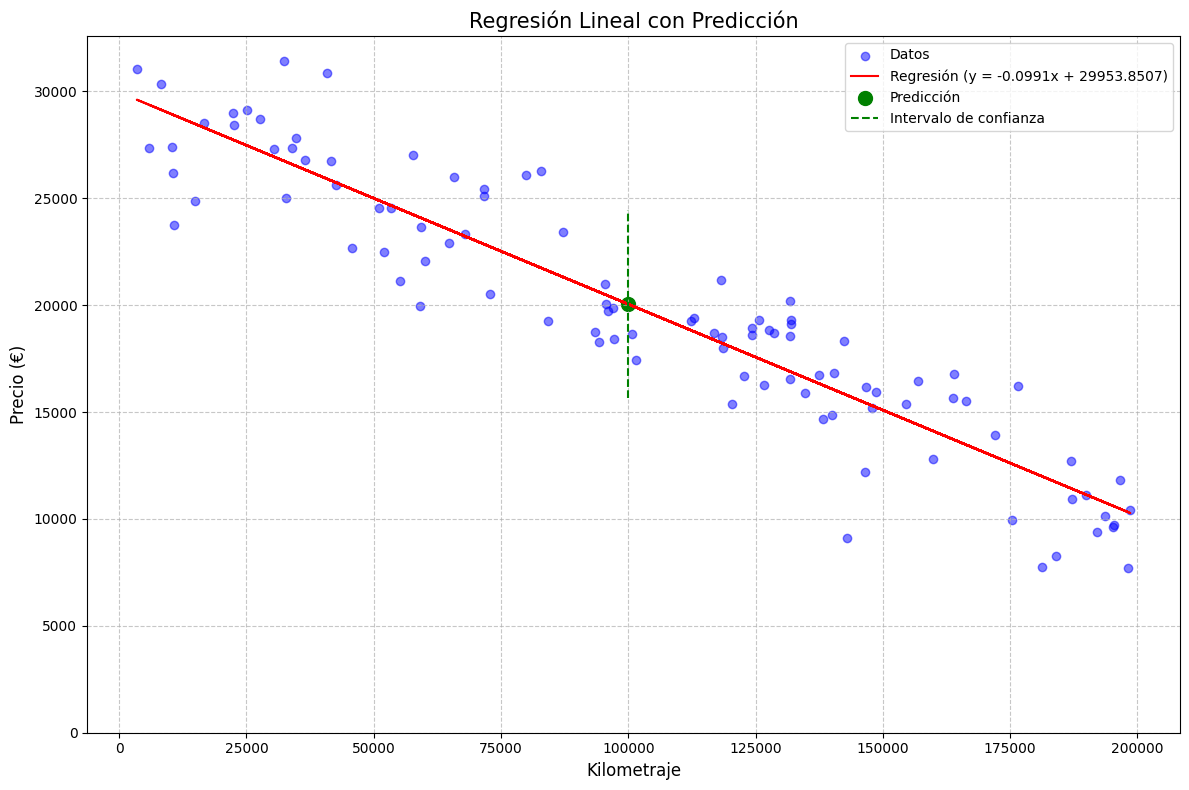

In [23]:
# Asumimos que ya tenemos 'pendiente' e 'intercepto' de las etapas anteriores

# Función para predecir el precio dado un kilometraje
def predecir_precio(kilometraje):
    return pendiente * kilometraje + intercepto

# Kilometraje para el cual queremos predecir el precio
kilometraje_prediccion = 100000

# Realizar la predicción
precio_predicho = predecir_precio(kilometraje_prediccion)

# Imprimir el resultado
print(f"\nPredicción para un coche con {kilometraje_prediccion:,} km:")
print(f"Precio estimado: {precio_predicho:.2f} €")

# Calcular el intervalo de confianza (asumiendo una distribución normal de los residuos)
import scipy.stats as stats

# Calcular el error estándar de la estimación
n = len(x)
y_pred = pendiente * x + intercepto
se = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))

# Calcular el error estándar de la predicción
se_pred = se * np.sqrt(1 + 1/n + (kilometraje_prediccion - np.mean(x))**2 / np.sum((x - np.mean(x))**2))

# Calcular el intervalo de confianza del 95%
t_value = stats.t.ppf(0.975, n - 2)
margen_error = t_value * se_pred

intervalo_inferior = precio_predicho - margen_error
intervalo_superior = precio_predicho + margen_error

print(f"Intervalo de confianza del 95%:")
print(f"  Límite inferior: {intervalo_inferior:.2f} €")
print(f"  Límite superior: {intervalo_superior:.2f} €")

# Visualizar la predicción en el gráfico
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue', alpha=0.5, label='Datos')
plt.plot(x, y_pred, color='red', label=f'Regresión (y = {pendiente:.4f}x + {intercepto:.4f})')
plt.scatter(kilometraje_prediccion, precio_predicho, color='green', s=100, label='Predicción')
plt.vlines(kilometraje_prediccion, intervalo_inferior, intervalo_superior, color='green', linestyle='--', label='Intervalo de confianza')

plt.title('Regresión Lineal con Predicción', fontsize=15)
plt.xlabel('Kilometraje', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()